**Assignment 2 Solutions** <br>
Importing Required Libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading the dataset

In [24]:
df = pd.read_csv('./extended_salary_data.csv')
m, n = df.shape
df.insert(0, column='Intercept', value=np.ones(m)) #adding a column of ones for constant in hypothesis function

Creating x, y for regression model

In [25]:
x = np.array(df.iloc[:, :-1].values)
y = np.array(df.iloc[:, -1].values)

Plotting y vs x

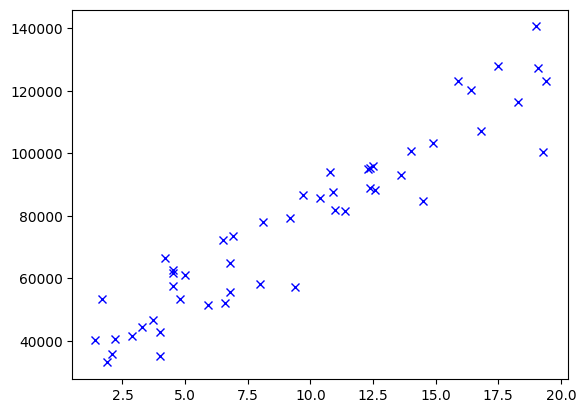

In [26]:
plt.plot(x[:,1], y, 'bx', linewidth=2)

Statistics of dataset

In [27]:
df.describe()

,0,YearsExperience,Salary
count,50.0,50.000000,50.00000
mean,1.0,9.480000,77370.54740
std,0.0,5.485491,28298.92442
min,1.0,1.400000,33048.80000
25%,1.0,4.500000,53861.88000
50%,1.0,9.300000,78598.65000
75%,1.0,13.350000,95356.22500
max,1.0,19.400000,140646.44000


Splitting Dataset for training and validation

In [28]:
x_train, x_valid = np.split(x, [int(0.8*len(x))])
y_train, y_valid = np.split(y, [int(0.8*len(y))])

Defining Linear Regression Model

In [29]:
class LinearRegression:
    def __init__(self, theta0 = None, eps = 1e-5, a = 3e-5):
        self.theta = theta0
        self.eps = eps
        self.a = a
    def fit(self, x, y):
        m, n = x.shape
        self.theta = np.zeros(n)
        while True:
            oldtheta = np.copy(self.theta)
            self.theta += self.a * np.dot((y - np.dot(x, self.theta)), x) /m
            if np.linalg.norm(self.theta - oldtheta, ord=1) < self.eps:
                break
    def predict(self, x):
        return np.dot(x, self.theta)

Creating instance of model and fitting it on training dataset

In [30]:
model = LinearRegression()
model.fit(x_train, y_train)

Final Theta/Weights of Model

In [31]:
print(model.theta)

[29575.02667529  5013.87030258]


Calculating MSE and MAE

In [46]:
mse_valid = (np.linalg.norm(y_valid - model.predict(x_valid), ord=2)) ** 2 / m
mae_valid = np.linalg.norm(y_valid - model.predict(x_valid), ord=1)
mae_train = np.linalg.norm(y_train - model.predict(x_train), ord=1)
mse_train = (np.linalg.norm(y_train - model.predict(x_train), ord=2)) ** 2 /m
print('MSE on valid dataset', mse_valid)
print('MAE on valid dataset', mae_valid)
print('MSE on train dataset', mse_train)
print('MAE on train dataset', mae_train)

MSE on valid dataset 10292311.094812317
MAE on valid dataset 61954.85247672654
MSE on train dataset 72595919.45533374
MAE on train dataset 301521.90248416807


Plotting regression line over dataset

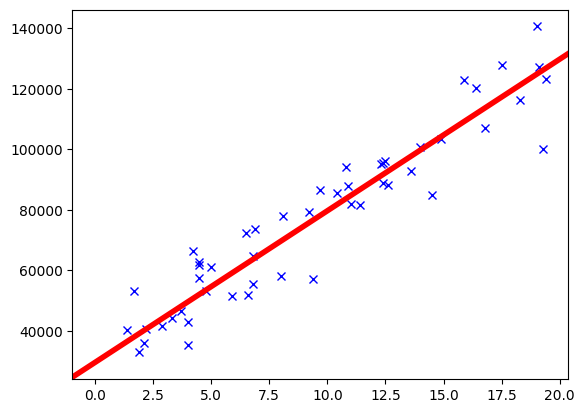

In [33]:
plt.plot(x[:,1], y, 'bx', linewidth=2)
plt.axline((0, model.theta[0]), slope=model.theta[1] , linewidth=4, color='r')
plt.show()

**BONUS**

In [34]:
df = pd.read_csv('./extended_salary_data.csv')
m, n = df.shape
df.insert(0, column='Intercept', value=np.ones(m))

Adding new column of synthetic feature

In [35]:
df.insert(2, column='NumProjectsCompleted', value=np.array((df['YearsExperience'])/2 - 1).astype(int))

Adding random noise to data

In [36]:
#adding poisson noise since Number of project completed should be integer
noise = np.random.poisson(1, m)
df['NumProjectsCompleted'] += noise

New Dataset

In [37]:
print(df)

    intercept  YearsExperience  NumProjectsCompleted     Salary
0         1.0              8.1                     4   77884.67
1         1.0             19.1                     9  127213.68
2         1.0             14.9                     6  103343.52
3         1.0             12.4                     5   88988.96
4         1.0              4.0                     1   35214.78
5         1.0              4.0                     1   42801.56
6         1.0              2.1                     0   35893.61
7         1.0             17.5                     7  128071.22
8         1.0             12.4                     5   95436.18
9         1.0             14.5                     7   84869.60
10        1.0              1.4                     2   40240.84
11        1.0             19.4                     8  123149.18
12        1.0             16.8                     7  107230.78
13        1.0              5.0                     1   61116.76
14        1.0              4.5          

Creating x, y

In [38]:
x = np.array(df.iloc[:, :-1].values)
y = np.array(df.iloc[:, -1].values)

Plotting new column data against y

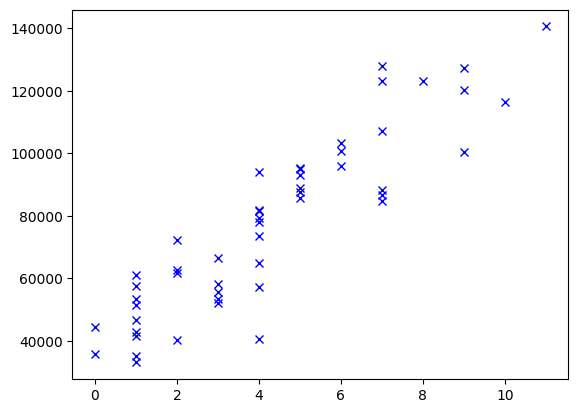

In [39]:
plt.plot(x[:,2], y, 'bx', linewidth=2)

In [40]:
x_train_new, x_valid_new = np.split(x, [int(0.8*len(x))])
y_train_new, y_valid_new = np.split(y, [int(0.8*len(y))])

In [41]:
model_new = LinearRegression()
model_new.fit(x_train_new, y_train_new)

In [42]:
model_new.theta

array([29410.00945561,  4132.89807343,  1952.95021299])

In [45]:
mse_valid_new = (np.linalg.norm(y_valid - model_new.predict(x_valid_new), ord=2)) ** 2 / m
mae_valid_new = np.linalg.norm(y_valid - model_new.predict(x_valid_new), ord=1)
mae_train_new = np.linalg.norm(y_train - model_new.predict(x_train_new), ord=1)
mse_train_new = (np.linalg.norm(y_train - model_new.predict(x_train_new), ord=2)) ** 2 / m
print('MSE on valid dataset', mse_valid_new)
print('MAE on valid dataset', mae_valid_new)
print('MSE on train dataset', mse_train_new)
print('MAE on train dataset', mae_train_new)

MSE on valid dataset 9375023.468473487
MAE on valid dataset 56330.46978517894
MSE on train dataset 69399887.40534556
MAE on train dataset 289297.54828626267


Comparing Old model with New

In [47]:
print("Changes:")
print('Change in MSE of Validation Dataset: ', (mse_valid - mse_valid_new))
print('Change in MAE of Validation Dataset: ', (mae_valid - mae_valid_new))
print('Change in MSE of Train Dataset: ', (mse_train - mse_train_new))
print('Change in MAE of Train Dataset: ', (mae_train - mae_train_new))

Changes:
Change in MSE of Validation Dataset:  917287.6263388302
Change in MAE of Validation Dataset:  5624.382691547602
Change in MSE of Train Dataset:  3196032.0499881804
Change in MAE of Train Dataset:  12224.354197905399
